## PMF & CDF

In [64]:
import scipy 
import scipy.stats
import matplotlib.pyplot as plt


In [65]:
rv = scipy.stats.norm(loc=1, scale=2) # 평균 1 편차 2

#### 확률밀도함수 PMF

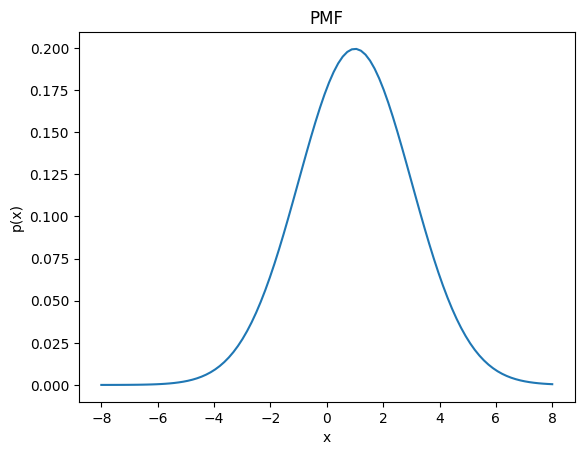

In [68]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("PMF")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

#### 누적분포 함수 CDF

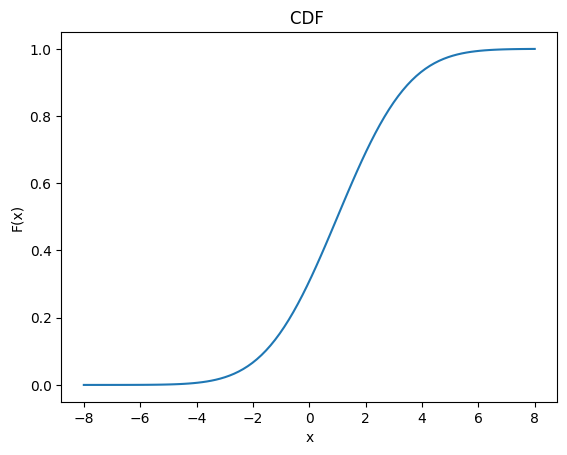

In [69]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title("CDF ")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

#### 표준 점수 Z score 구하기

In [70]:
import numpy as np

x = [0, 3, 5, 7, 10]

s = np.std(x)
m = np.mean(x)
z = (7 - m) / s
print(z)

0.5872202195147035


In [71]:
from scipy import stats

stats.zscore(x)

array([-1.46805055, -0.58722022,  0.        ,  0.58722022,  1.46805055])

In [72]:
stats.norm.cdf(0)

0.5

In [73]:
stats.norm.cdf(1.0) - stats.norm.cdf(-1.0)

0.6826894921370859

In [74]:
stats.norm.cdf(2.0) - stats.norm.cdf(-2.0)

0.9544997361036416

In [75]:
stats.norm.ppf(0.9)

1.2815515655446004

## 모집단의 평균 범위 추정하기: 신뢰구간

In [76]:
#import gdown
#gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

In [121]:
import pandas as pd

df = pd.read_csv('fdfdf.csv', low_memory=False)
df.tail()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [115]:
python_books_index = ns_book7['주제분류번호'].str.startswith('00') & \
                    ns_book7['도서명'].str.contains('파이썬')

In [119]:
python_books = ns_book7[python_books_index]
python_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1040,1060,실전 알고리즘 트레이딩 배우기 (파이썬으로 시작하는 알고리즘 트레이딩의 기초와 실전...,세바스티앙 도나디오.수라브 고쉬 지음|이기홍,에이콘출판,2021,9791161754901,NaN,NaN,NaN,004.73,1,1,2021-03-09
1162,1185,파이썬으로 경험하는 빅데이터 분석과 머신러닝,"이영호,이수현 지음",생능출판사,2021,9788970504803,NaN,9,NaN,005.135,1,1,2021-03-02
1447,1504,금융 파이썬 쿡북 (금융 데이터 처리와 기술 분석부터 딥러닝 적용까지),에릭 르윈슨,에이콘출판,2021,9791161750507,NaN,NaN,NaN,005.133,1,2,2021-02-22
1563,1630,프로그래머를 위한 파이썬 (실전 프로젝트로 배우는 소프트웨어 개발의 원리와 정석),데인 힐라드 지음|황반석,제이펍,2020,9791190665636,NaN,NaN,NaN,005.133,1,2,2021-02-16
1571,1640,"엑셀 × 파이썬 업무 자동화 - 매크로, VBA는 이제 낡았다!","카네히로 카즈미 (지은이), 서수환 (옮긴이)",인사이트,2020,9788966262847,NaN,NaN,NaN,005.53,1,2,2021-02-16


In [117]:
len(python_books)

251

In [118]:
python_mean = np.mean(python_books['대출건수'])
python_mean

14.749003984063744

In [81]:
python_std = np.std(python_books['대출건수'])
python_se = python_std / np.sqrt(len(python_books))
python_se

0.8041612072427442

In [82]:
stats.norm.ppf(0.975)

1.959963984540054

In [83]:
stats.norm.ppf(0.025)

-1.9599639845400545

In [84]:
print(python_mean-1.96*python_se, python_mean+1.96*python_se)

13.172848017867965 16.325159950259522


In [85]:
## 모집단의 평균 범위 추정하기: 신뢰구간

python_books_index = ns_book7['주제분류번호'].str.startswith('00') & \
                     ns_book7['도서명'].str.contains('파이썬')
python_books = ns_book7[python_books_index]
python_books.head()

len(python_books)

python_mean = np.mean(python_books['대출건수'])
python_mean

python_std = np.std(python_books['대출건수'])
python_se = python_std / np.sqrt(len(python_books))
python_se

stats.norm.ppf(0.975)

stats.norm.ppf(0.025)

print(python_mean-1.96*python_se, python_mean+1.96*python_se)

13.172848017867965 16.325159950259522


## 정규분포가 아닐 때 가설 검증하기: 순열검정

In [86]:
def statistic(x, y):
    return np.mean(x) - np.mean(y)

In [87]:
import pandas as pd

In [88]:
import numpy as np

In [89]:
def permutation_test(x, y):
    # 표본의 평균 차이를 계산합니다.
    obs_diff = statistic(x, y)
    # 두 표본을 합칩니다.
    all = np.append(x, y)
    diffs = []
    np.random.seed(42)
    # 순열 검정을 1000번 반복합니다.
    for _ in range(1000):
        # 전체 인덱스를 섞습니다.
        idx = np.random.permutation(len(all))
        # 랜덤하게 두 그룹으로 나눈 다음 평균 차이를 계산합니다.
        x_ = all[idx[:len(x)]]
        y_ = all[idx[len(x):]]
        diffs.append(statistic(x_, y_))
    # 원본 표본보다 작거나 큰 경우의 p-값을 계산합니다.
    less_pvalue = np.sum(diffs < obs_diff)/1000
    greater_pvalue = np.sum(diffs > obs_diff)/1000
    # 둘 중 작은 p-값을 선택해 2를 곱하여 최종 p-값을 반환합니다.
    return obs_diff, np.minimum(less_pvalue, greater_pvalue) * 2

In [90]:
permutation_test(python_books['대출건수'], cplus_books['대출건수'])

NameError: name 'cplus_books' is not defined

In [91]:
# scipy 1.8 버전 이상에서만 실행됩니다.
# res = stats.permutation_test((python_books['대출건수'], cplus_books['대출건수']), 
#                              statistic, random_state=42)
# 결과는 약 3.153 0.0258입니다.
# print(res.statistic, res.pvalue)

In [122]:
java_books_indx = ns_book7['주제분류번호'].str.startswith('00') & \
                  ns_book7['도서명'].str.contains('자바스크립트')
java_books = ns_book7[java_books_indx]
java_books.head()
jav_books[1030]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1030,1049,자바스크립트로 하는 자료 구조와 알고리즘 (핵심 자료 구조 및 알고리즘을 이해하고 ...,<b>배세민</b>,에이콘,2019,9791161753447,NaN,NaN,NaN,005.138,1,1,2021-03-09
2521,2627,프레임워크 없는 프론트엔드 개발 (자바스크립트 프레임워크 뜯어보기),프란세스코 스트라츨로,에이콘출판,2021,9791161754895,NaN,NaN,NaN,005.138,1,1,2021-02-08
4989,5330,(ES6로 기초부터 다시 배우는) 자바스크립트 파워북,어포스트 지음,어포스트,2020,9791197122811,NaN,9,NaN,005.133,1,4,2020-10-19
4997,5338,모던 자바스크립트 deep dive :자바스크립트의 기본 개념과 동작 원리,이웅모 지음,위키북스,2020,9791158392239,NaN,9,NaN,005.138,1,4,2020-10-19
14028,14759,(자바스크립트와 함께하는) 블록체인 코딩 :JavaScript와node.js로 분산...,"Eric Traub 지음 ;금창섭,안휘,이재준 옮김",홍릉과학출판사,2020,9791156007043,NaN,9,NaN,005.1,1,4,2020-04-20


In [124]:
java_book2 = java_books.reset_index(inplace=True)
java_books.head()

,index,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1030,1049,자바스크립트로 하는 자료 구조와 알고리즘 (핵심 자료 구조 및 알고리즘을 이해하고 ...,<b>배세민</b>,에이콘,2019,9791161753447,NaN,NaN,NaN,005.138,1,1,2021-03-09
1,2521,2627,프레임워크 없는 프론트엔드 개발 (자바스크립트 프레임워크 뜯어보기),프란세스코 스트라츨로,에이콘출판,2021,9791161754895,NaN,NaN,NaN,005.138,1,1,2021-02-08
2,4989,5330,(ES6로 기초부터 다시 배우는) 자바스크립트 파워북,어포스트 지음,어포스트,2020,9791197122811,NaN,9,NaN,005.133,1,4,2020-10-19
3,4997,5338,모던 자바스크립트 deep dive :자바스크립트의 기본 개념과 동작 원리,이웅모 지음,위키북스,2020,9791158392239,NaN,9,NaN,005.138,1,4,2020-10-19
4,14028,14759,(자바스크립트와 함께하는) 블록체인 코딩 :JavaScript와node.js로 분산...,"Eric Traub 지음 ;금창섭,안휘,이재준 옮김",홍릉과학출판사,2020,9791156007043,NaN,9,NaN,005.1,1,4,2020-04-20


In [93]:
print(len(java_books), np.mean(java_books['대출건수']))

105 15.533333333333333


In [94]:
permutation_test(python_books['대출건수'], java_books['대출건수'])

(-0.7843293492695889, 0.566)

In [95]:
permutation_test(python_books['대출건수'], java_books['대출건수'])4

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3584378948.py, line 1)

In [96]:
import scipy 
import scipy.stats
import matplotlib.pyplot as plt


In [97]:
rv = scipy.stats.norm(loc=1, scale=2) # 평균 1 편차 2

### 확률밀도함수

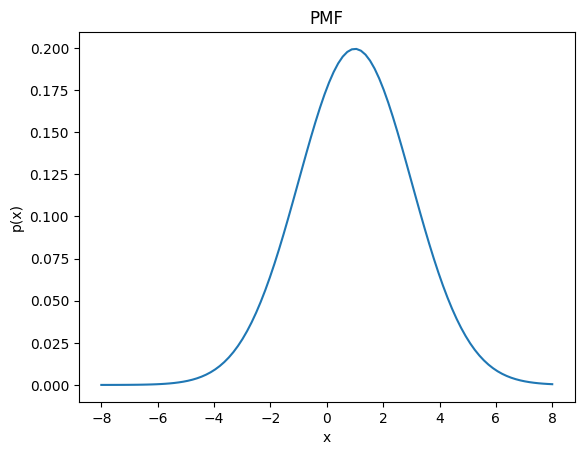

In [98]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("PMF")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

### 누적분포 함수 

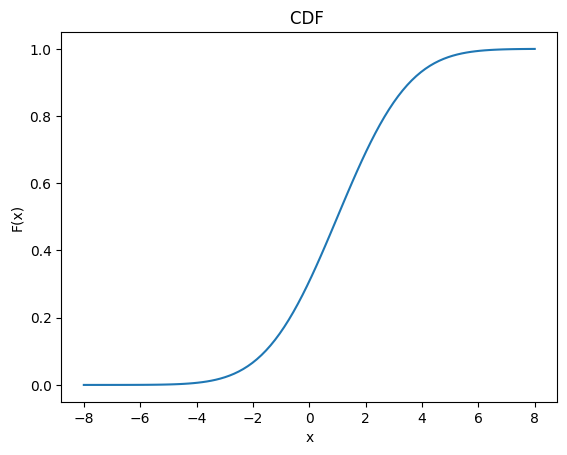

In [99]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title("CDF ")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()